# Explore input data samples

In [1]:
import os, sys

import numpy as np

from numpy import genfromtxt

import pandas as pd
#import pandas.io.data
from pandas_datareader import data, wb
from pandas import DataFrame



%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

In [2]:
CSV_DIR='/g/data/u46/fxz547/Githubz/geodata_analytics'
infile='samples_10000.csv'

In [3]:
my_file_csv = os.path.join(CSV_DIR, infile) 

# read csv file into numpy array
my_data = genfromtxt(my_file_csv, delimiter=',')

In [4]:
type(my_data)

numpy.ndarray

In [6]:
my_data.shape

(10000, 17)

In [12]:
# numpy not good at handling heterogenous data. non-numeric data shown as nan

print my_data[:3,:]

[[             nan              nan              nan              nan
               nan              nan              nan              nan
               nan              nan              nan              nan
               nan              nan              nan              nan
               nan]
 [  4.49333333e+02              nan   1.63830000e+04   3.60000000e+02
    4.91000000e+02   4.97000000e+02   8.22000000e+02   9.46000000e+02
    5.62000000e+02   2.46398787e-01   3.16631872e-01   7.01357466e-02
    6.74264008e-02  -1.87861272e-01              nan   3.61400000e+03
    2.08200000e+03]
 [  4.61333333e+02              nan   1.63830000e+04   3.77000000e+02
    4.59000000e+02   5.48000000e+02   8.56000000e+02   1.06000000e+03
    5.94000000e+02   2.19373219e-01   3.95655036e-01   1.06471816e-01
    1.28205128e-01  -1.80689655e-01              nan   3.61100000e+03
    2.07000000e+03]]


# Using Pandas  to handle heterogeneous tabular data structure with labeled axes 
http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook

In [13]:
pdf = pd.read_csv(my_file_csv)

In [14]:
pdf.head()

,Bright,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
0,449.333333,CloudShadow_Bare,16383.0,360.0,491.0,497.0,822.0,946.0,562.0,0.246399,0.316632,0.070136,0.067426,-0.187861,115_-032_2011-01-02T01-55-10.679038,3614.0,2082.0
1,461.333333,CloudShadow_Bare,16383.0,377.0,459.0,548.0,856.0,1060.0,594.0,0.219373,0.395655,0.106472,0.128205,-0.180690,115_-032_2011-01-02T01-55-10.679038,3611.0,2070.0
2,521.666667,CloudShadow_Bare,16383.0,410.0,555.0,600.0,890.0,1014.0,690.0,0.194631,0.292543,0.065126,0.108434,-0.126582,115_-032_2011-01-02T01-55-10.679038,3610.0,2069.0
3,707.333333,CloudShadow_Veg,16383.0,551.0,742.0,829.0,1089.0,1080.0,720.0,0.135558,0.185510,-0.004149,-0.015048,-0.203980,115_-032_2011-01-02T01-55-10.679038,2941.0,1638.0
4,685.666667,W_LargeBody,16383.0,408.0,842.0,807.0,1193.0,558.0,242.0,0.193000,-0.202857,-0.362650,-0.553506,-0.662718,115_-032_2011-01-02T01-55-10.679038,3104.0,1109.0


In [16]:
# Group by Pixel Class_name, then count the number of rows in each group
pdf.groupby('Class_name').count()

,Bright,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
Class_name,,,,,,,,,,,,,,,,
CloudShadow_Bare,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
CloudShadow_Veg,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086
W_LargeBody,3206,3206,3206,3206,3206,3206,3206,3206,3206,3206,3206,3206,3206,3206,3206,3206
W_Sea,5523,5523,5523,5523,5523,5523,5523,5523,5523,5523,5523,5523,5523,5523,5523,5523
W_Swamp,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [18]:
pdf.groupby('Mean_PQMas').count()

,Bright,Class_name,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
Mean_PQMas,,,,,,,,,,,,,,,,
4095.0,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
8191.0,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
15871.0,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459
16383.0,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357


In [19]:
#perfect pixel has a quality flag 13683 in the column Mean_PQMa
bin(16383)

'0b11111111111111'

# Data Column Relationships

In [21]:
import math

# verify the Bright definition, as average of the band rgb
# Bright =  Mean_tm1c + Mean_tm2c + Mean_tm3c
aver123=(pdf.iloc[0:,3] + pdf.iloc[0:,4]+ pdf.iloc[0:,5])/3.0

type(aver123)

In [22]:
aver123.head()

0    449.333333
1    461.333333
2    521.666667
3    707.333333
4    685.666667
dtype: float64

In [23]:
type(aver123)

pandas.core.series.Series

In [25]:
# Band ratios as features
ratio_43=(pdf['Mean_tm4c']- pdf['Mean_tm3c'])/(pdf['Mean_tm4c'] + pdf['Mean_tm3c'])  # = the NDI_43 column
ratio_43.head()  # check this is equal to NDI_43 column

0    0.246399
1    0.219373
2    0.194631
3    0.135558
4    0.193000
dtype: float64

# Plotting the values

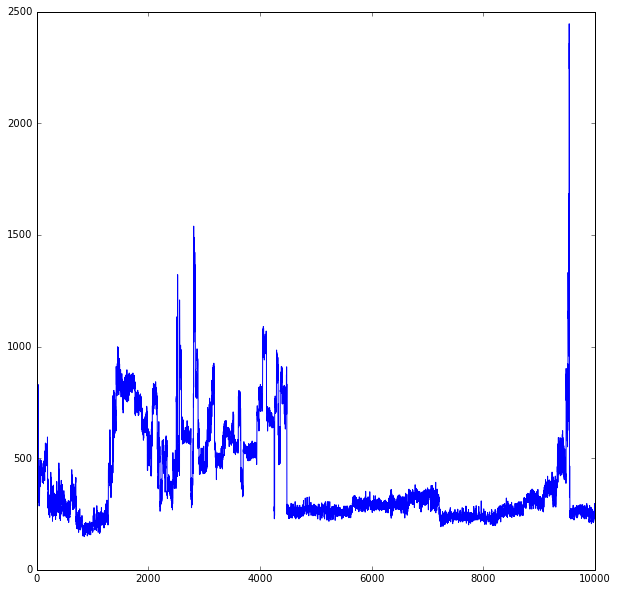

In [29]:
colname= 'Bright'   #'Mean_PQMas' #'NDI_43' #'Mean_tm1c'
plt.figure(); pdf[colname].plot()

# Subsetting the samples for analysis

In [33]:
#get the column names as list
clm_list = []
for column in pdf.columns: clm_list.append(column)
print clm_list[3:14]


['Mean_tm1c', 'Mean_tm2c', 'Mean_tm3c', 'Mean_tm4c', 'Mean_tm5c', 'Mean_tm7c', 'NDI_43', 'NDI_52', 'NDI_54', 'NDI_72', 'NDI_74']


In [58]:
#select the columns values into numpy array
#X = pdf[clm_list[3:14]].values
# select 3 most important features
X= pdf[[clm_list[7],clm_list[10],clm_list[12]] ].values
Y = pdf[clm_list[1]].values

print X.shape, type(X)
print Y.shape

(9999, 3) <type 'numpy.ndarray'>
(9999,)


In [71]:
print ([clm_list[7],clm_list[10],clm_list[12]] )

['Mean_tm5c', 'NDI_52', 'NDI_72']


# Hello Scikit-learn

In [59]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)

In [60]:
# Traing the model with the sample data %time clf = clf.fit(X, Y)

clf = clf.fit(X, Y)

In [65]:
# verify the model using function predict
isample=123
# Or get a random sample to compare
isample=np.random.random_integers(0,999)

print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample])

(553, array(['CloudShadow_Veg'], dtype=object), 'CloudShadow_Veg')


In [ ]:
# more methods, split the samples , validation 

In [ ]:
# Let's generate the Tree.

In [66]:
from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot 
with open("de_tree.dot", 'w') as f: f = tree.export_graphviz(clf, out_file=f)

    
# dot -Tpdf iris.dot -o iris.pdf

In [67]:
!dot -Tpdf de_tree.dot -o de_tree.pdf

In [68]:
!ls -l de_tree.*

-rw-r--r--+ 1 fxz547 v10  5068 Jun 18 09:54 de_tree.dot
-rw-r--r--+ 1 fxz547 v10 20724 Jun 18 09:54 de_tree.pdf


In [54]:
# Or do this way. Need to refine own data into iris-like
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'iris' is not defined

# Select Perfect Pix Data to Analyse 

In [73]:
perf_pix= pdf[pdf['Mean_PQMas'] == 16383.0]  # where(Mean_PQMas=16383)

In [74]:
perf_pix.head()

,Bright,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
0,449.333333,CloudShadow_Bare,16383.0,360.0,491.0,497.0,822.0,946.0,562.0,0.246399,0.316632,0.070136,0.067426,-0.187861,115_-032_2011-01-02T01-55-10.679038,3614.0,2082.0
1,461.333333,CloudShadow_Bare,16383.0,377.0,459.0,548.0,856.0,1060.0,594.0,0.219373,0.395655,0.106472,0.128205,-0.180690,115_-032_2011-01-02T01-55-10.679038,3611.0,2070.0
2,521.666667,CloudShadow_Bare,16383.0,410.0,555.0,600.0,890.0,1014.0,690.0,0.194631,0.292543,0.065126,0.108434,-0.126582,115_-032_2011-01-02T01-55-10.679038,3610.0,2069.0
3,707.333333,CloudShadow_Veg,16383.0,551.0,742.0,829.0,1089.0,1080.0,720.0,0.135558,0.185510,-0.004149,-0.015048,-0.203980,115_-032_2011-01-02T01-55-10.679038,2941.0,1638.0
4,685.666667,W_LargeBody,16383.0,408.0,842.0,807.0,1193.0,558.0,242.0,0.193000,-0.202857,-0.362650,-0.553506,-0.662718,115_-032_2011-01-02T01-55-10.679038,3104.0,1109.0


In [76]:
perf_pix.shape

(3357, 17)

In [80]:
# change W_* into Water; all other classes into NotWater. Binary classes
perf_pix.ix[perf_pix.Class_name.str.match('W_*'), 'Class_name'] = 'Water'

In [81]:
perf_pix.tail()

,Bright,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
9541,2446.333333,Water,16383.0,2070.0,2625.0,2644.0,2268.0,740.0,306.0,-0.076547,-0.560178,-0.507979,-0.791198,-0.762238,115_-032_2011-01-02T01-55-10.679038,2921.0,918.0
9542,2377.000000,Water,16383.0,2101.0,2563.0,2467.0,2100.0,489.0,274.0,-0.080359,-0.679554,-0.622248,-0.806838,-0.769166,115_-032_2011-01-02T01-55-10.679038,2920.0,917.0
9543,2244.333333,Water,16383.0,2023.0,2471.0,2239.0,1731.0,216.0,178.0,-0.127960,-0.839226,-0.778120,-0.865610,-0.813515,115_-032_2011-01-02T01-55-10.679038,2920.0,916.0
9544,2360.000000,Water,16383.0,2070.0,2594.0,2416.0,2100.0,398.0,274.0,-0.069973,-0.733957,-0.681345,-0.808926,-0.769166,115_-032_2011-01-02T01-55-10.679038,2920.0,915.0
9545,1994.333333,Water,16383.0,1835.0,2316.0,1832.0,1327.0,489.0,242.0,-0.159861,-0.651337,-0.461454,-0.810790,-0.691523,115_-032_2011-01-02T01-55-10.679038,2920.0,914.0


In [83]:
# Group by Pixel Class_name, then count the number of rows in each group
perf_pix.groupby('Class_name').count()

,Bright,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
Class_name,,,,,,,,,,,,,,,,
CloudShadow_Bare,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
CloudShadow_Veg,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Water,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279


In [84]:
# change non 'W_*' into NoWater
perf_pix.ix[perf_pix.Class_name.str.match('^W_*')==False, 'Class_name'] = 'NoWater'

In [85]:
# Group by Pixel Class_name, then count the number of rows in each group
perf_pix.groupby('Class_name').count()

,Bright,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
Class_name,,,,,,,,,,,,,,,,
NoWater,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
Water,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279


In [87]:
# Apply a ML algorithm to the pdf type
from sklearn import tree
from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot 
    
def apply_ml(pdf):
    #get the column names as list    
    clm_list = []
    for column in pdf.columns: clm_list.append(column)
    print (clm_list[7],clm_list[10],clm_list[12])
    
    #select the columns values into numpy array
    #X = pdf[clm_list[3:14]].values
    # select 3 most important features
    X= pdf[[clm_list[7],clm_list[10],clm_list[12]] ].values
    Y = pdf[clm_list[1]].values

    print X.shape, type(X)
    print Y.shape

    clf = tree.DecisionTreeClassifier(max_depth=5)
    clf= clf.fit(X,Y)
    
    # evaluate the model using function predict
    # isample=123
    # Or get a random sample to compare
    isample=np.random.random_integers(0,999)

    print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample])

    dot_filename="de_tree.dot"
    with open(dot_filename, 'w') as f: f = tree.export_graphviz(clf, out_file=f)

    
    # !dot -Tpdf de_tree.dot -o de_tree.pdf
    return  dot_filename

In [88]:
apply_ml(perf_pix)

('Mean_tm5c', 'NDI_52', 'NDI_72')
(3357, 3) <type 'numpy.ndarray'>
(3357,)
(656, array(['Water'], dtype=object), 'Water')


'de_tree.dot'

In [89]:
!dot -Tpdf de_tree.dot -o de_tree.pdf